 # Data Cleaning/Data Preprocessing
### Before Building a Model
#### Steps of Preprocessing of Data:
#### *1 ) Import Necessary Libraries*
#### *2 ) Read Dataset*
#### *3 ) Sanity Check of Data*
#### *4 ) Exploratary Data Analysis (EDA)*
#### *5 ) Missing Value Treatment*
#### *6 ) Outlier Treatment*
#### *7 ) Duplicates & Garbage Value Treatments*
#### *8 ) Encoding Of Data*

# Import Necesarry Libraries

In [85]:
# import the libraries
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Step-2 Read The Dataset

In [86]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.tail()

In [87]:
df.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1736,Montenegro,2011,Developing,75.4,113.0,0,6.56,666.737437,91.0,5,...,95.0,6.92,95.0,0.1,7318.742449,6279.0,1.9,2.0,0.792,15.1
339,Botswana,2012,Developing,63.4,3.0,2,0.01,12.834474,95.0,7,...,96.0,6.27,95.0,4.4,729.231453,289315.0,7.3,7.0,0.687,12.5
1757,Morocco,2006,Developing,71.0,133.0,22,0.58,127.763200,95.0,1217,...,97.0,5.23,97.0,0.1,2191.478567,3869346.0,6.4,6.3,0.575,10.0
612,Congo,2011,Developing,62.9,285.0,7,3.82,0.000000,7.0,315,...,69.0,2.79,82.0,3.5,NaN,NaN,8.0,7.6,0.558,10.7
2871,Venezuela (Bolivarian Republic of),2002,Developing,73.1,167.0,10,6.89,0.000000,6.0,2392,...,81.0,4.93,65.0,0.1,NaN,NaN,1.7,1.7,0.684,11.0


# Step-3 Sanity Check of Data

In [88]:
df.shape

(2938, 22)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [90]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [91]:
#Finding Percentage of Missing Values.
df.isnull().sum()/df.shape[0]*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

# Step-4 Exploratary Data Analysis (EDA)

####  descriptive Statistics

In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [93]:
df.describe(include = "object")

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


# Univariate Analysis of Each Column With Visulization

#### Histogram to Understand the Distribution

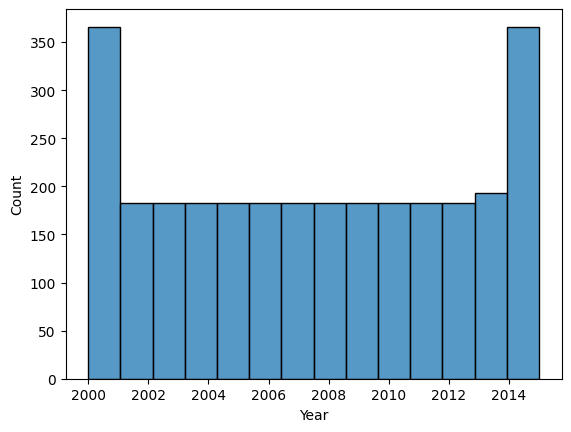

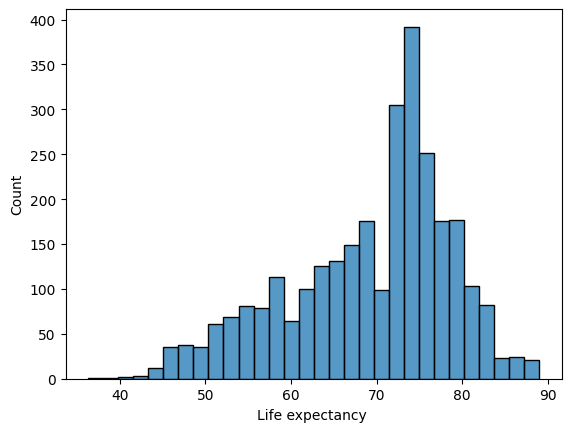

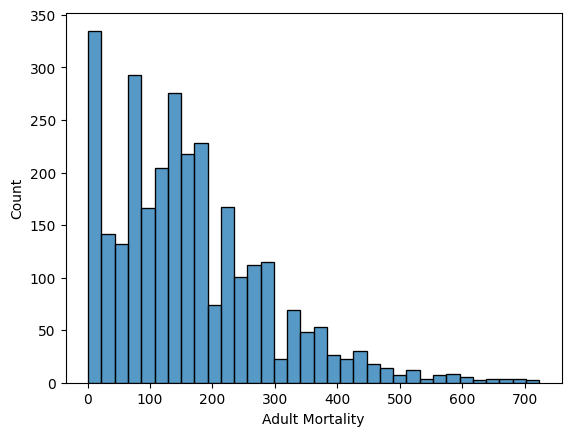

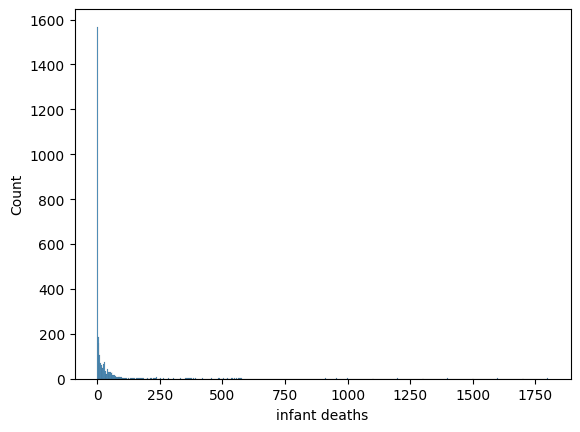

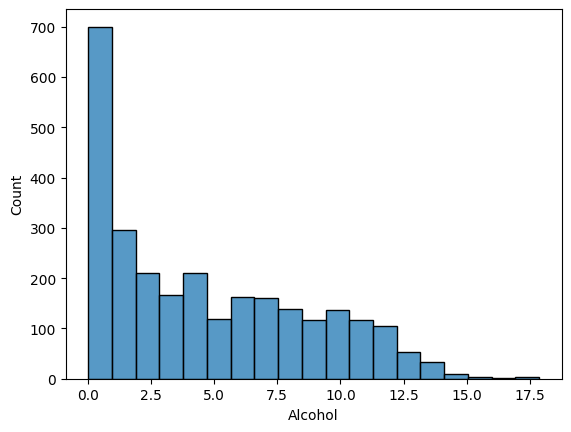

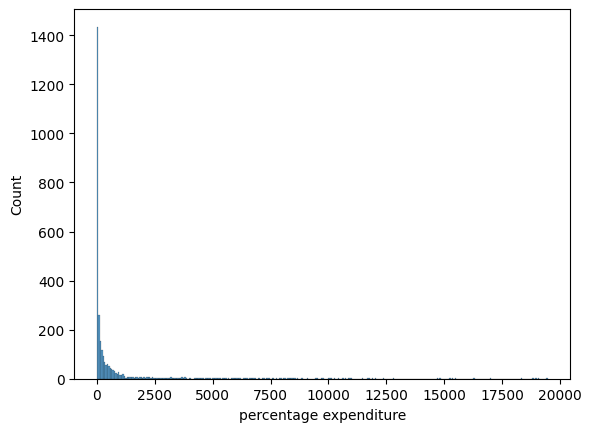

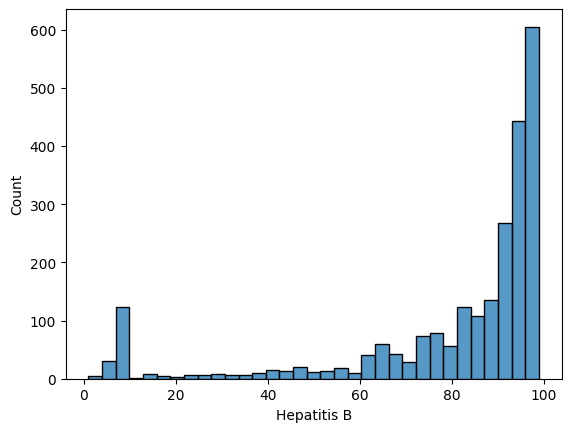

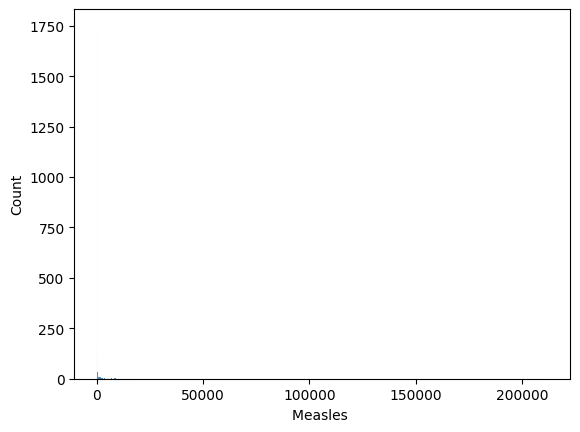

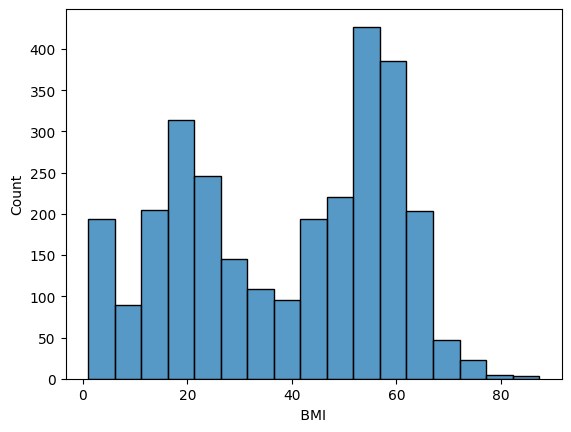

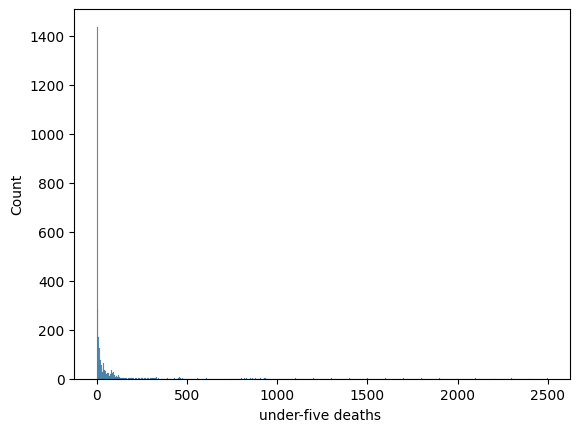

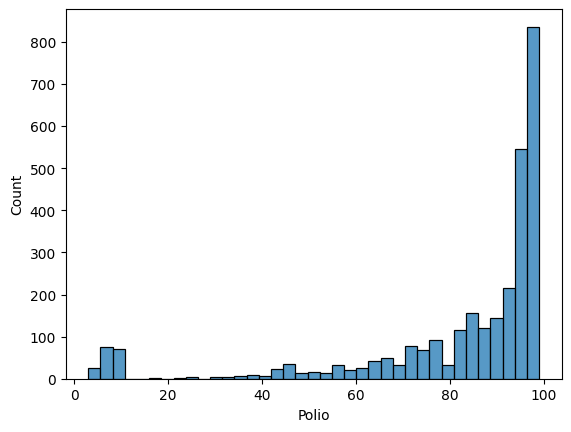

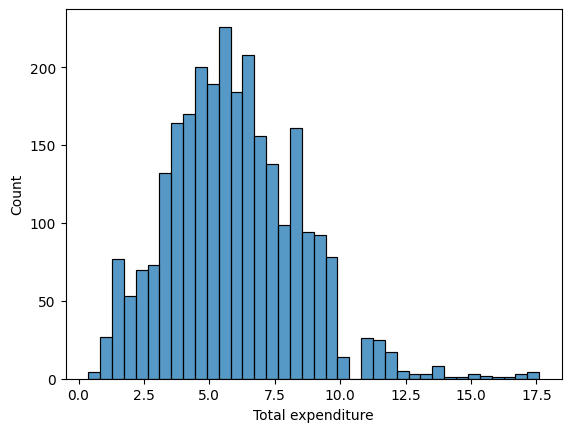

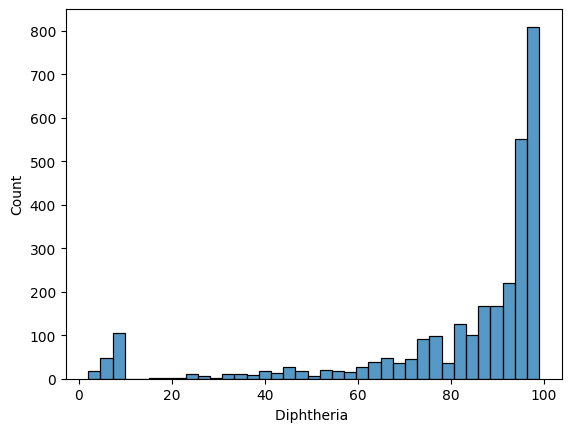

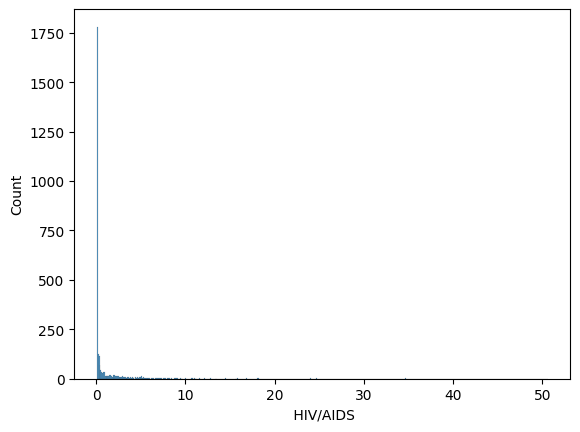

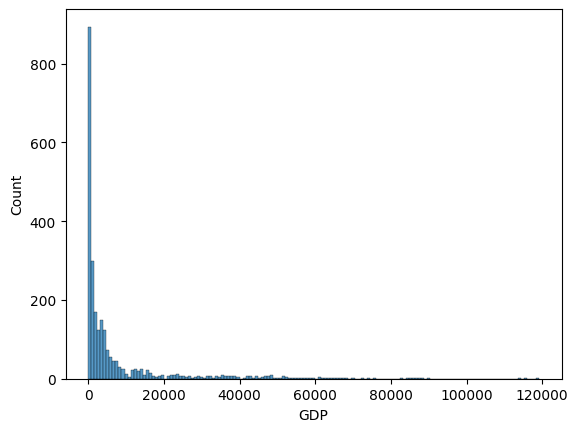

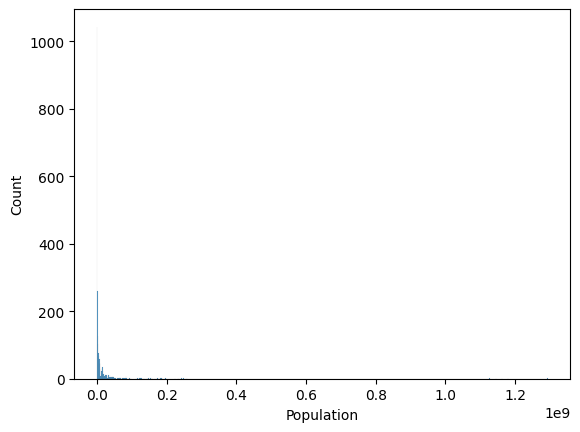

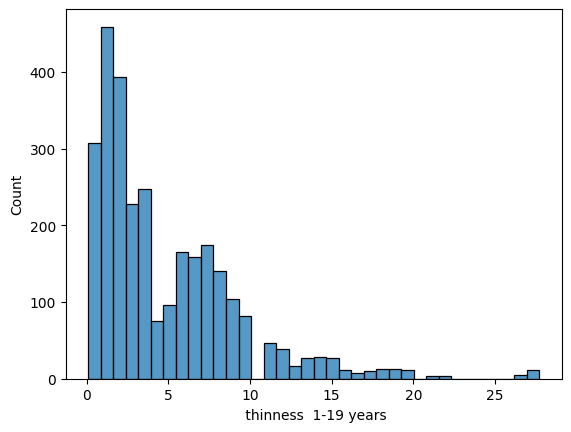

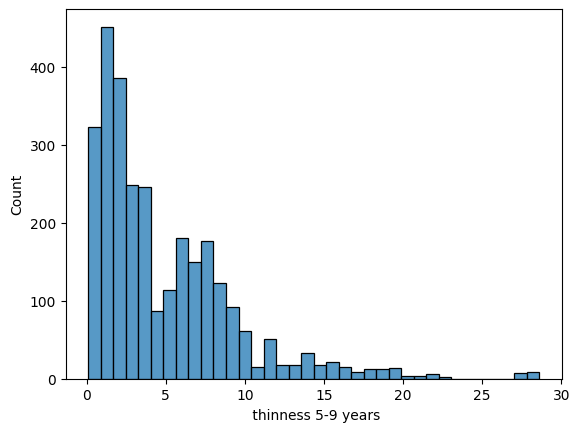

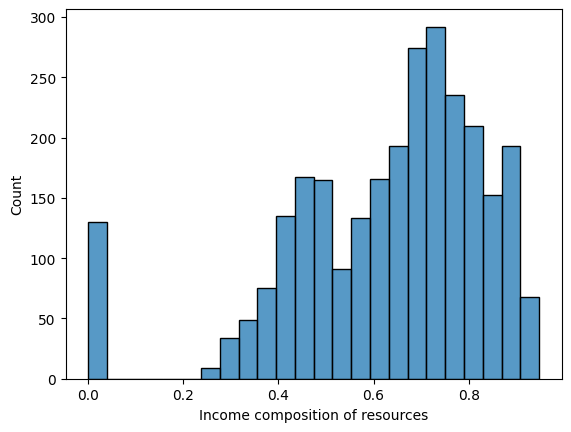

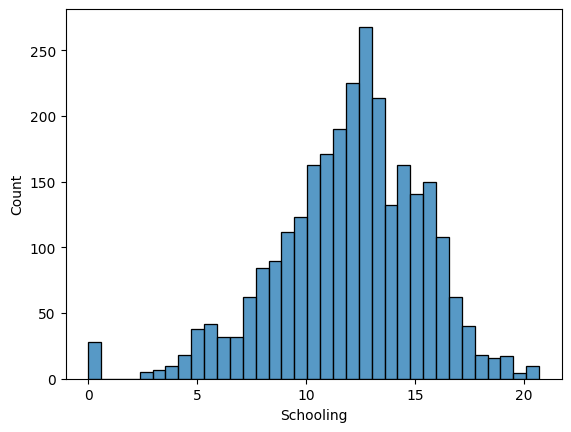

In [95]:
# Histogram to Understand the Distribution
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include = "number").columns:
    sns.histplot(data = df ,x = i)
    plt.show()

# Box-plot to Identify Outliers of data

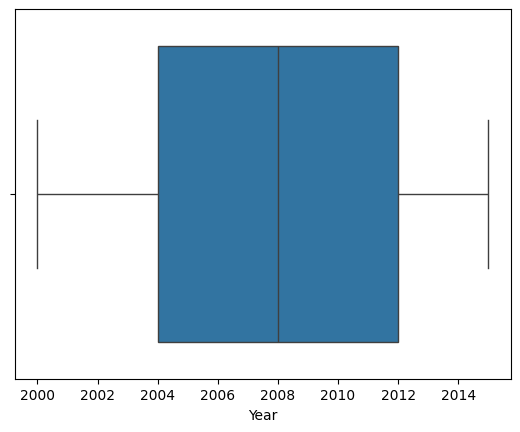

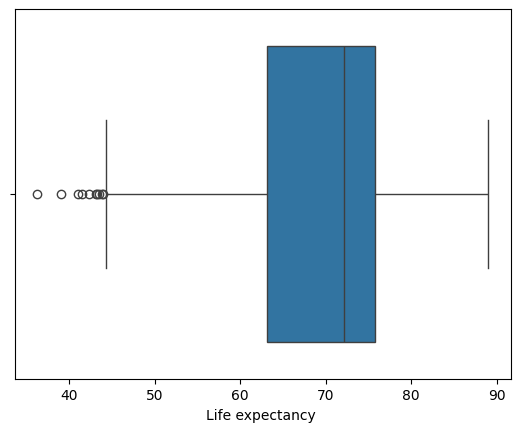

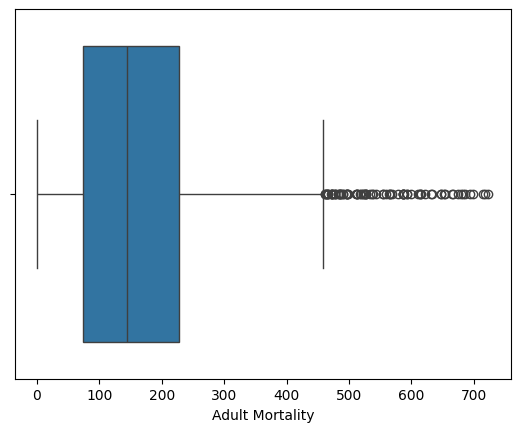

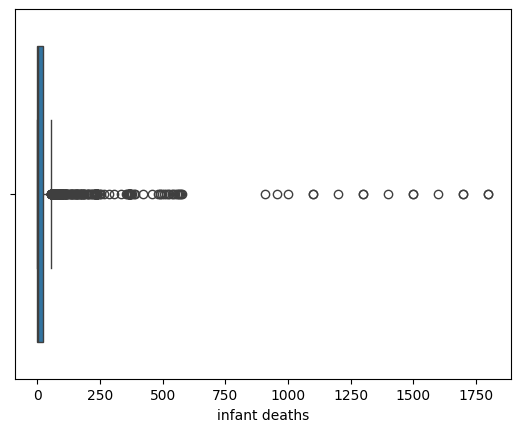

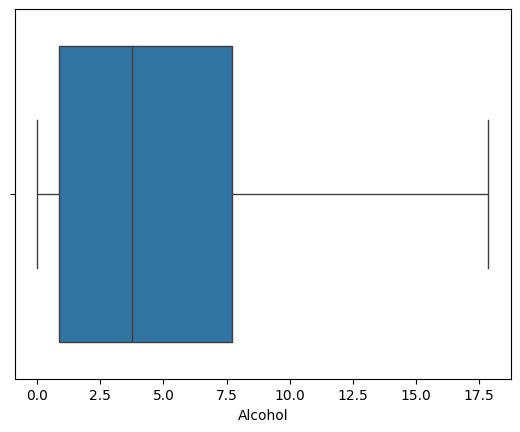

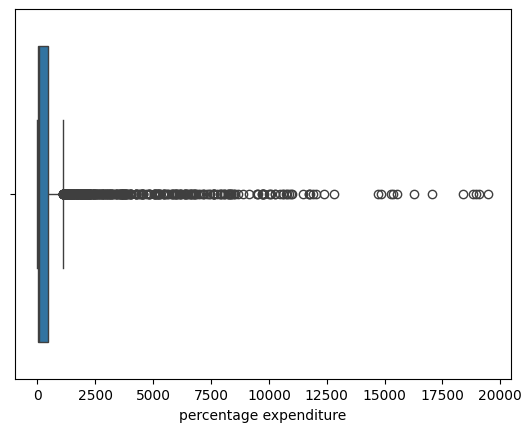

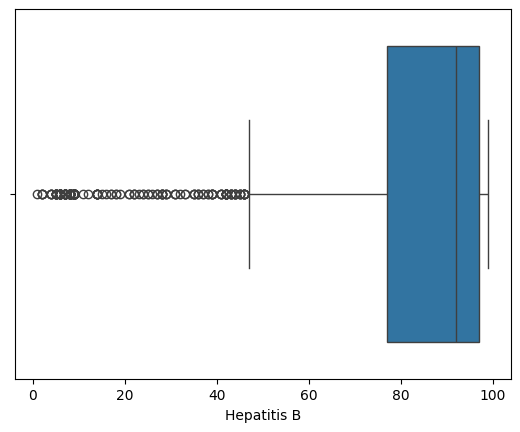

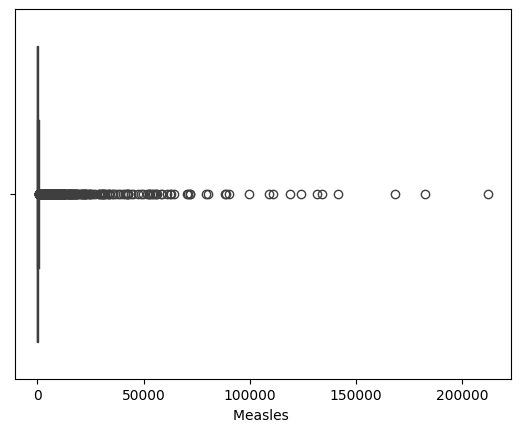

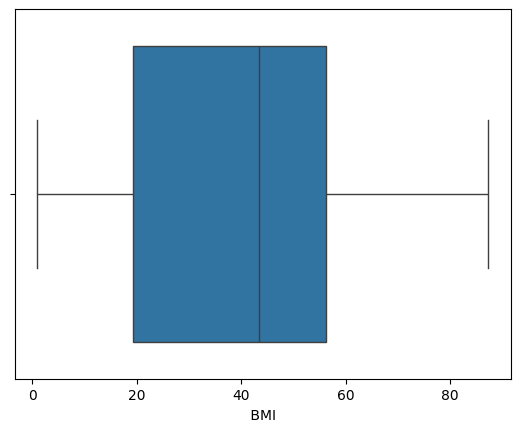

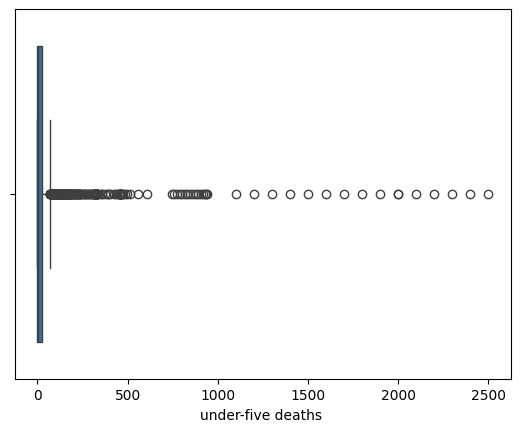

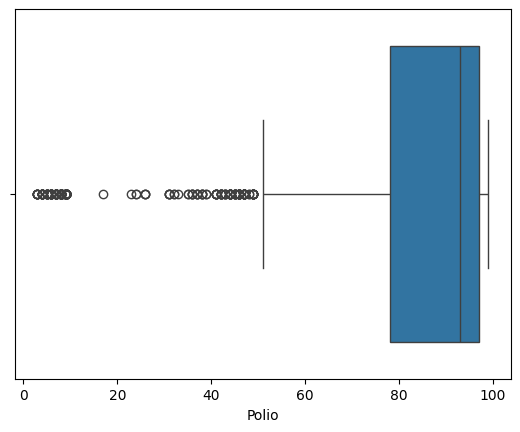

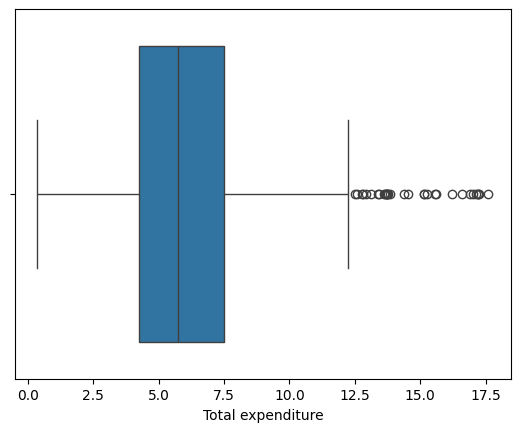

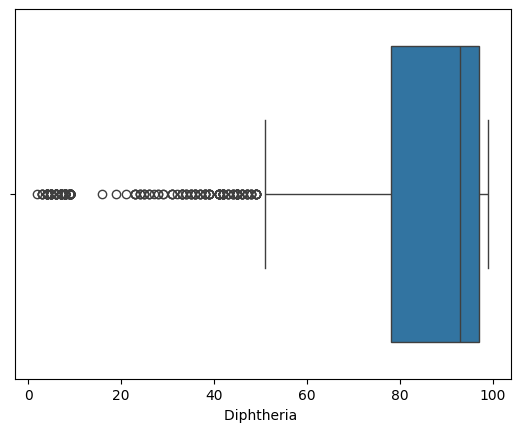

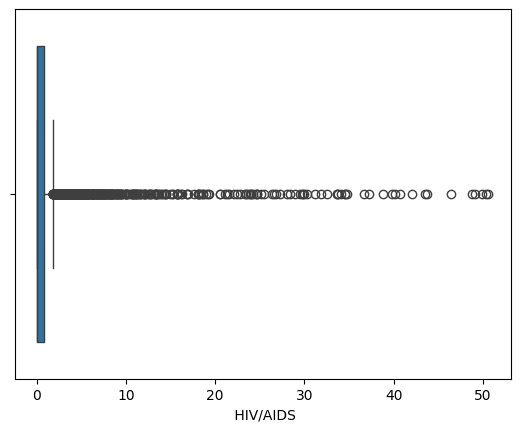

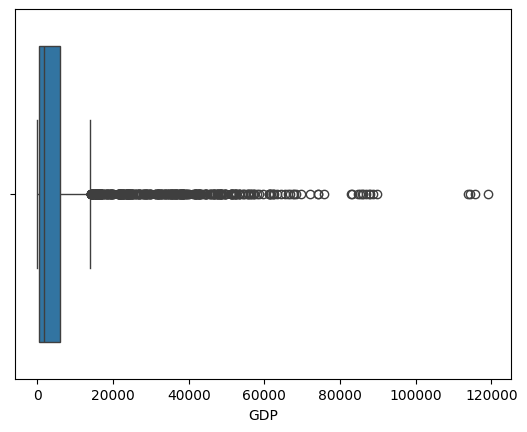

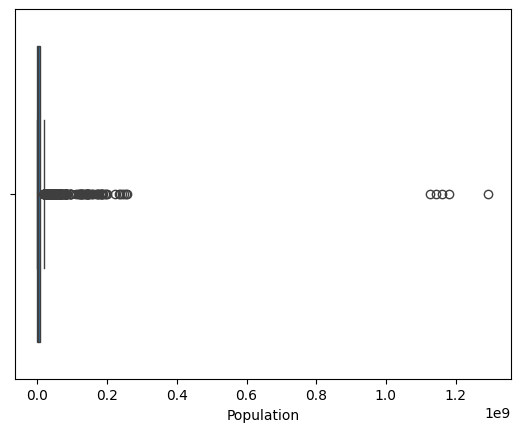

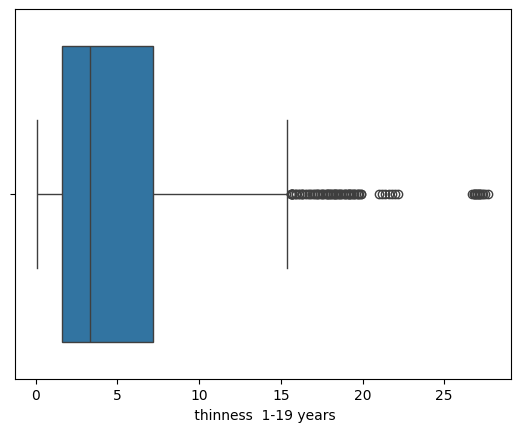

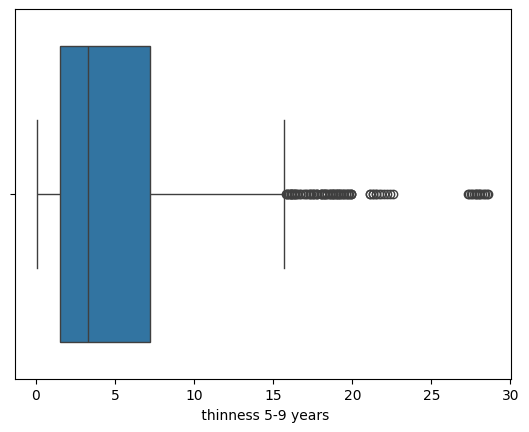

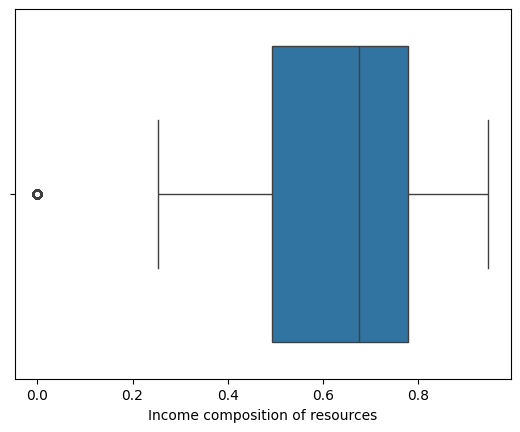

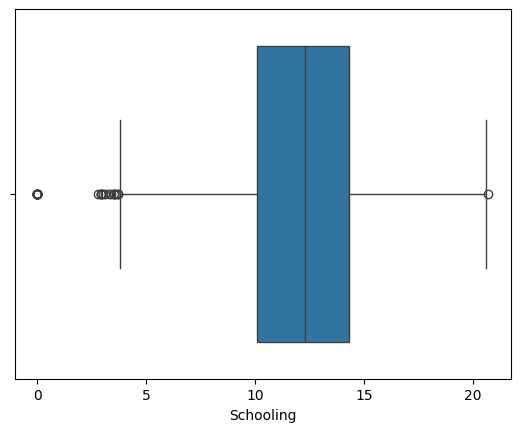

In [41]:
# Box-plot to Identify Outliers
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include = "number").columns:
    sns.boxplot(data = df ,x = i)
    plt.show()

# Scatter plot to undersatand the relationship

In [44]:
df.select_dtypes(include="number").columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

# Correlation with Heatmap to interpret the relation and multicolliniarity

In [119]:
s = df.select_dtypes(include = "number").corr()

In [120]:
s

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.021302,-0.082493,0.108974,-0.042937,0.094158,0.073218,0.134337,-0.139741,0.132267,0.016969,-0.047876,-0.050929,0.236594,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.171255,-0.157586,0.567694,-0.222529,0.465556,0.212299,0.479495,-0.556556,0.526496,-0.021538,-0.477183,-0.471584,0.688591,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.123971,0.031176,-0.387017,0.094146,-0.274823,-0.109945,-0.275131,0.523821,-0.333099,-0.013647,0.302904,0.308457,-0.436268,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.167421,0.501128,-0.227279,0.996629,-0.170689,-0.130846,-0.175171,0.025231,-0.151151,0.556801,0.465711,0.471350,-0.141571,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.094421,-0.051827,0.330408,-0.112370,0.221734,0.304795,0.222020,-0.048845,0.414982,-0.035252,-0.428795,-0.417414,0.436102,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.039528,-0.056596,0.228700,-0.087852,0.147259,0.188728,0.143624,-0.097857,0.627538,-0.025662,-0.251369,-0.252905,0.374730,0.389687
Hepatitis B,0.021302,0.171255,-0.123971,-0.167421,0.094421,0.039528,1.000000,-0.073021,0.112990,-0.170549,0.364176,0.063706,0.448527,-0.085497,0.109610,-0.130633,-0.098061,-0.101077,0.117652,0.144959
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.073021,1.000000,-0.175977,0.507809,-0.136166,-0.106298,-0.141882,0.030899,-0.103267,0.265966,0.224808,0.221072,-0.111089,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.112990,-0.175977,1.000000,-0.237669,0.284569,0.227359,0.283147,-0.243717,0.376540,-0.072301,-0.532025,-0.538911,0.487244,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.170549,0.507809,-0.237669,1.000000,-0.188720,-0.132300,-0.195668,0.038062,-0.157807,0.544423,0.467789,0.472263,-0.159264,-0.209373


In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(s,annot=True)

# Step-5 Missing Value Treatment

In [146]:
for i in ["Hepatitis B","Total expenditure","GDP","Income composition of resources","Measles ","infant deaths"]:
      df[i].fillna(df[i].median(),inplace=True)
for val in ["Alcohol"," BMI ","Polio","Population","Adult Mortality","Diphtheria "]:
      df[val].fillna(df[val].median(),inplace=False)
for v in ["Schooling"]:
      df[v].fillna(df[v].mean(),inplace=True)

In [137]:
#Step-5 Missing Value Treatment
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                    0
Diphtheria                          19
 HIV/AIDS                            0
GDP                                  0
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources      0
Schooling                            0
dtype: int64

In [147]:
for i in ["Hepatitis B","Total expenditure","GDP","Income composition of resources"]:
      df[i].fillna(df[i].median(),inplace=True)
for val in ["Alcohol"," BMI ","Polio","Population"]:
      df[val].fillna(df[val].median(),inplace=False)
for v in ["Schooling"]:
      df[v].fillna(df[v].mean(),inplace=True)

In [148]:
df.isnull().sum() #Life expectancy 10

Country                             0
Year                                0
Status                              0
Life expectancy                    10
Adult Mortality                     0
infant deaths                       0
Alcohol                             0
percentage expenditure              0
Hepatitis B                         0
Measles                             0
 BMI                                0
under-five deaths                   0
Polio                               0
Total expenditure                   0
Diphtheria                         19
 HIV/AIDS                           0
GDP                                 0
Population                          0
 thinness  1-19 years              34
 thinness 5-9 years                34
Income composition of resources     0
Schooling                           0
dtype: int64

In [140]:
# Another Way By Using KNNimputer

In [155]:
pip install -U scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    ----------------

In [156]:
from sklearn.impute import KNNImputer
impute = KNNImputer()



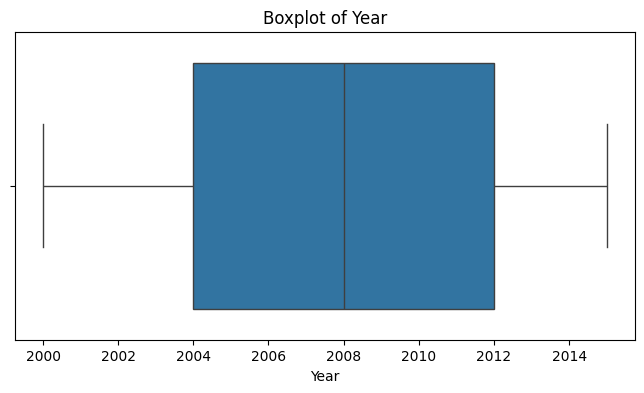

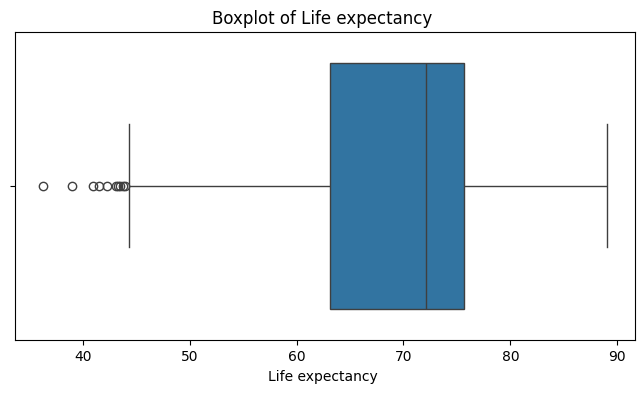

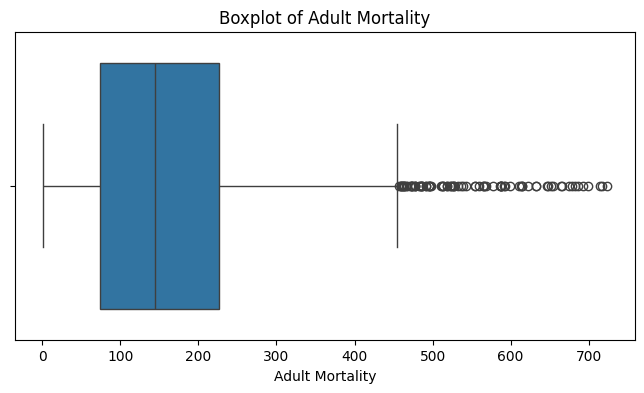

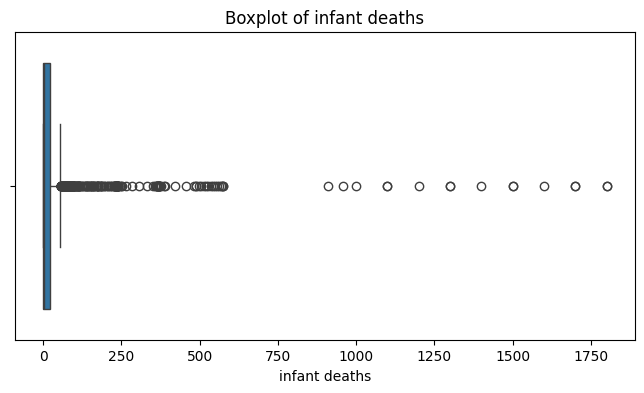

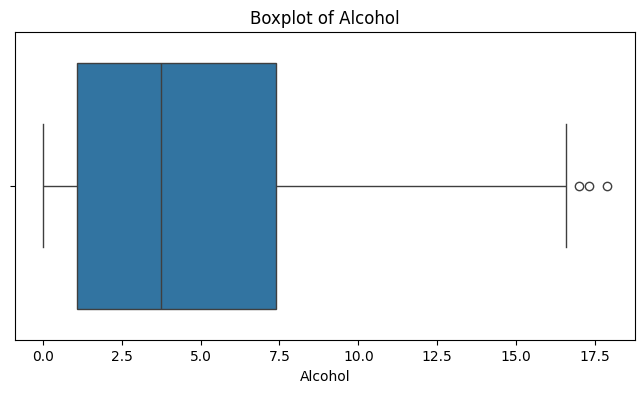

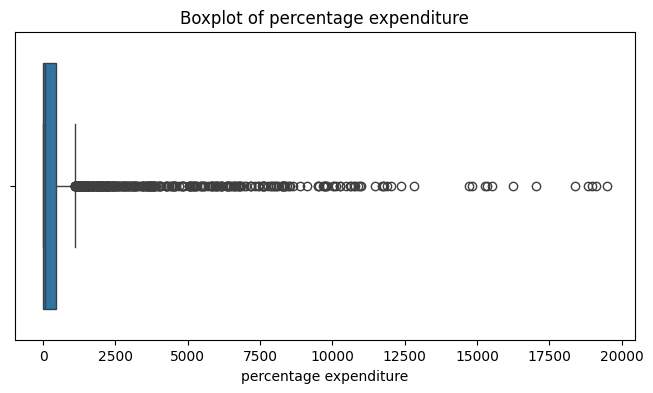

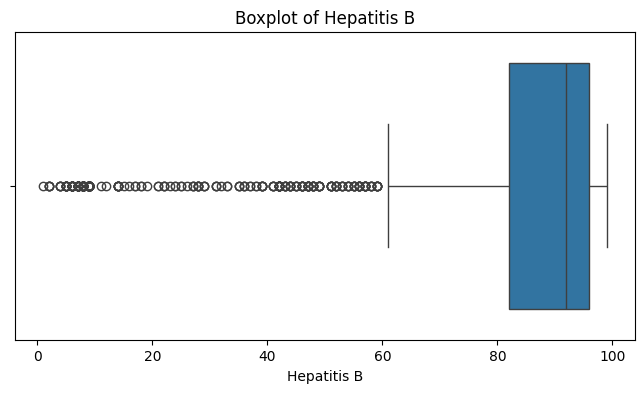

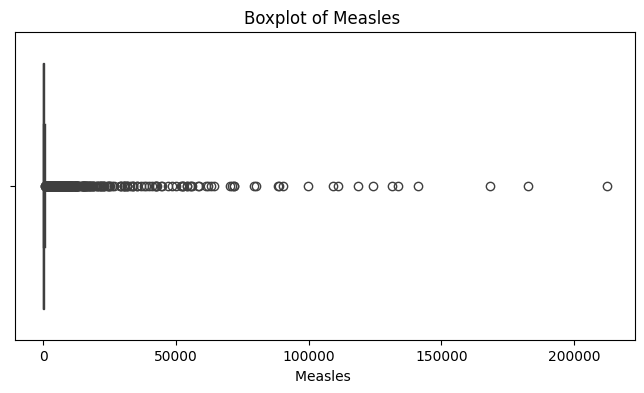

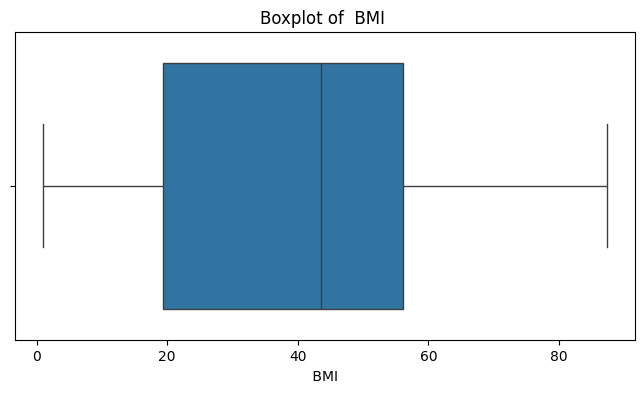

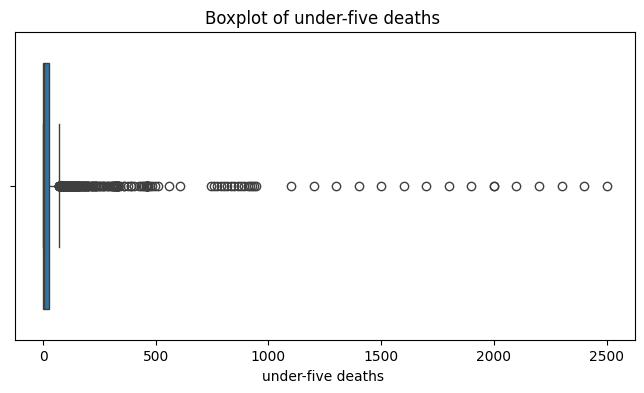

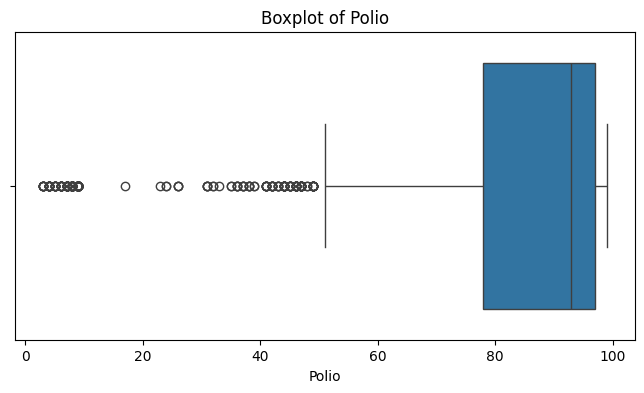

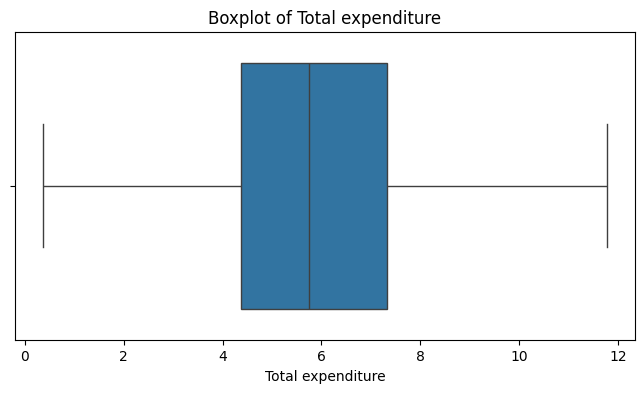

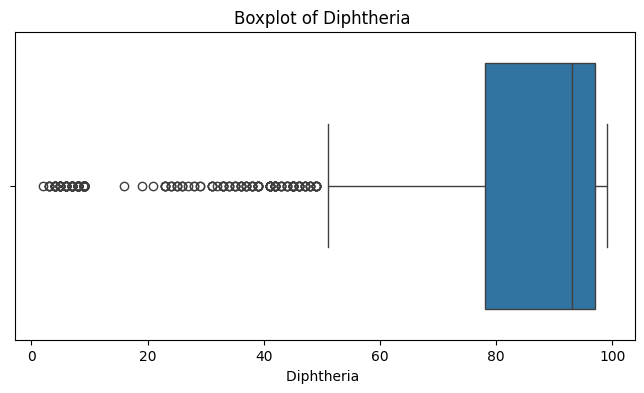

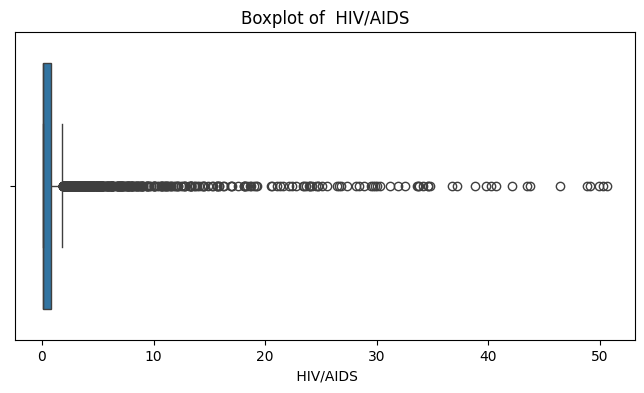

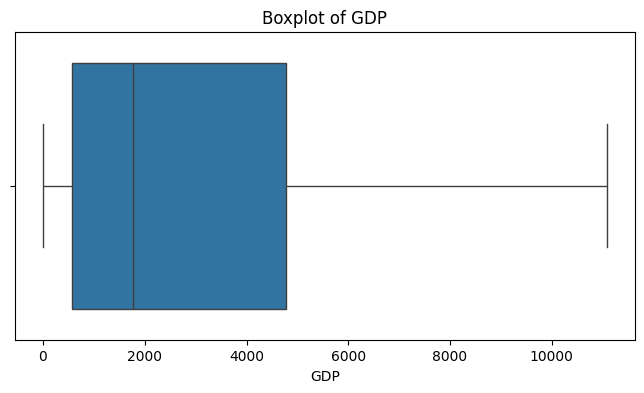

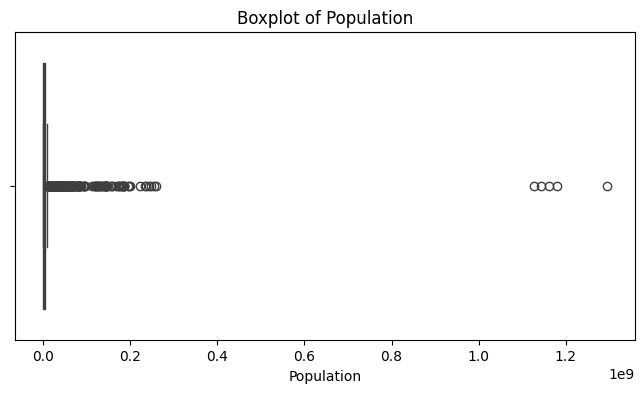

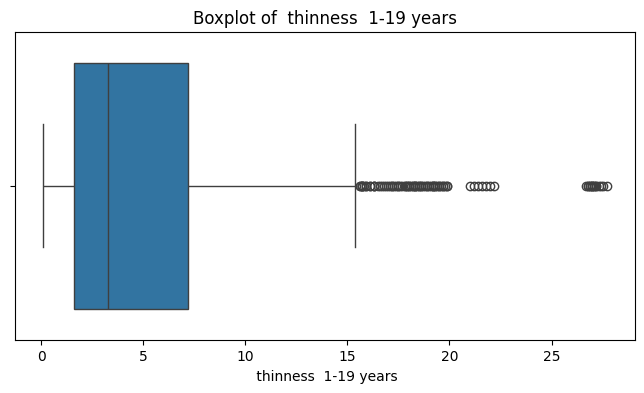

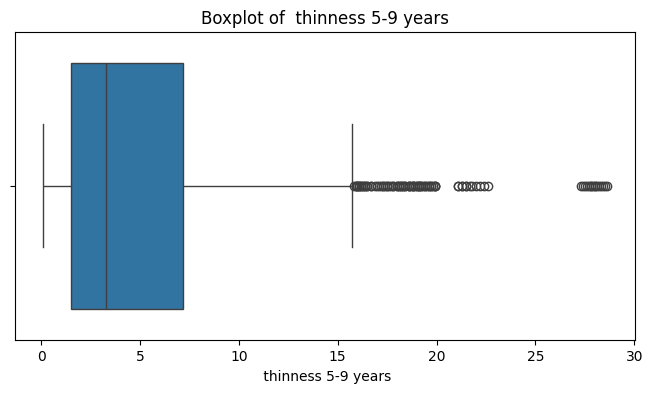

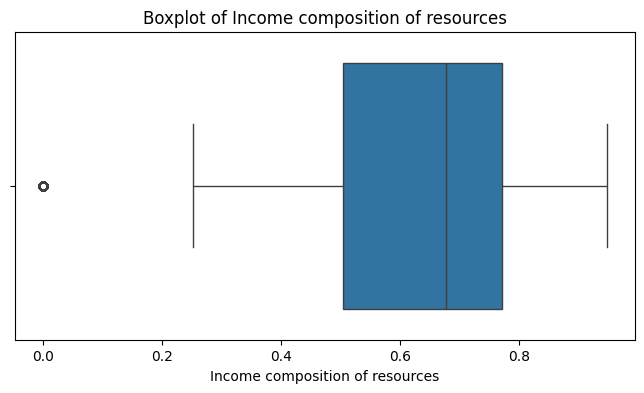

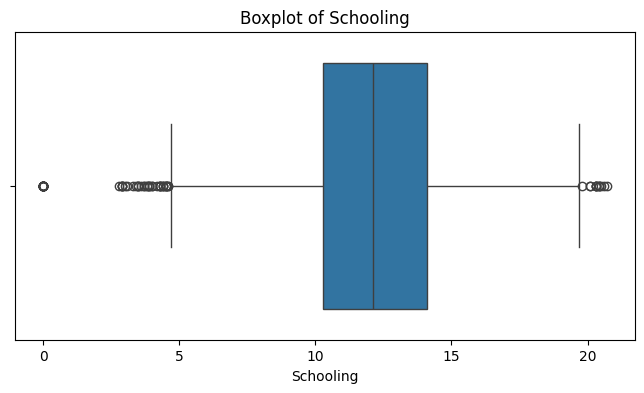

Missing values per column:

Country                             0
Year                                0
Status                              0
Life expectancy                    10
Adult Mortality                     0
infant deaths                       0
Alcohol                             0
percentage expenditure              0
Hepatitis B                         0
Measles                             0
 BMI                                0
under-five deaths                   0
Polio                               0
Total expenditure                   0
Diphtheria                         19
 HIV/AIDS                           0
GDP                                 0
Population                          0
 thinness  1-19 years              34
 thinness 5-9 years                34
Income composition of resources     0
Schooling                           0
dtype: int64

Remaining missing values after imputation:

Country                            0
Year                               0
Stat

In [157]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Assuming df is already loaded
# Visualizing numerical features with boxplots to detect outliers
for col in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Check for missing values
print("Missing values per column:\n")
print(df.isnull().sum())

# ---------------------------
# Data Imputation Using KNN
# ---------------------------

# Step 1: Install scikit-learn if not available
# !pip install scikit-learn  # Uncomment this line if running locally

# Step 2: Import KNNImputer
from sklearn.impute import KNNImputer

# Step 3: Create the imputer and apply it to the dataframe
imputer = KNNImputer(n_neighbors=5)

# Apply imputation only to numeric columns
df_numeric = df.select_dtypes(include="number")
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Replace original numeric columns with imputed values
df[df_numeric.columns] = df_numeric_imputed

# Check again for any remaining nulls
print("\nRemaining missing values after imputation:\n")
print(df.isnull().sum())


In [159]:
for i in df.select_dtypes(include = "number").columns:
    df[i]=impute.fit_transform(df[[i]])

In [160]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

# Step-6 Outlier Treatment

In [169]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [170]:
wisker(df['GDP'])

(np.float64(-5717.890296249999), np.float64(11077.782481749999))

In [171]:
for i in [ 'GDP', 'Total expenditure',' thinness  1-19 years', ' thinness 5-9 years']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

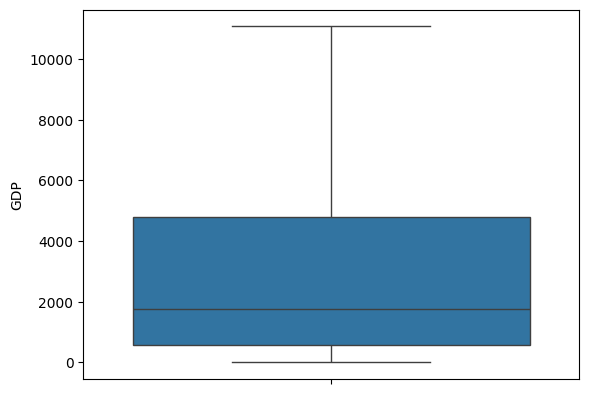

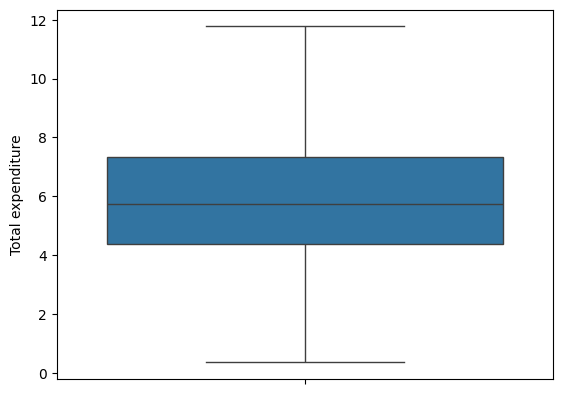

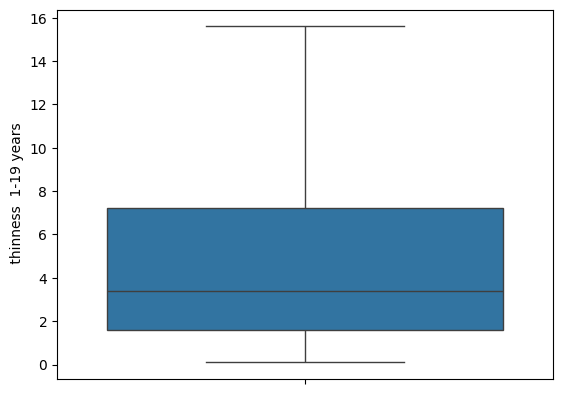

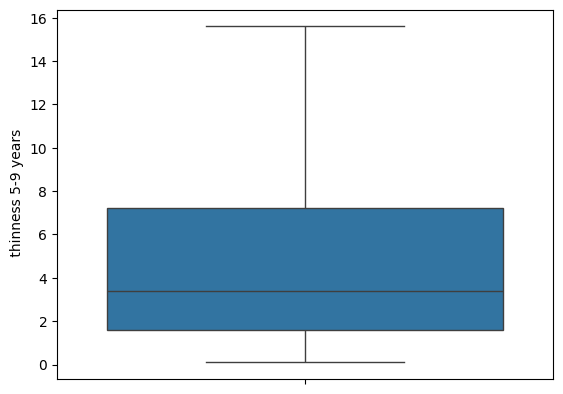

In [172]:
for i in [ 'GDP', 'Total expenditure',' thinness  1-19 years', ' thinness 5-9 years']:
    sns.boxplot(df[i])
    plt.show()

In [173]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# Step-7 Duplicates & Garbage Value Treatments

In [175]:
df.drop_duplicates()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015.0,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,15.6,15.6,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,15.6,15.6,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,15.6,15.6,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.6,15.6,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.6,15.6,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004.0,Developing,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003.0,Developing,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002.0,Developing,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001.0,Developing,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# step-8 Encoding Of Data

#### Do label encoding and one hot encoding with pd.getdummies

In [176]:
dummy = pd.get_dummies(data =df,columns=["Country","Status"],drop_first=True)
dummy

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,...,False,False,False,False,False,False,False,False,False,True
1,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,False,False,False,False,False,False,False,False,False,True
2,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,False,False,False,False,False,False,False,False,False,True
3,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,...,False,False,False,False,False,False,False,False,False,True
4,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004.0,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,27.1,42.0,...,False,False,False,False,False,False,False,False,True,True
2934,2003.0,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,26.7,41.0,...,False,False,False,False,False,False,False,False,True,True
2935,2002.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,40.0,...,False,False,False,False,False,False,False,False,True,True
2936,2001.0,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,25.9,39.0,...,False,False,False,False,False,False,False,False,True,True
